In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("customer_churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df=df.drop(['customerID'],axis=1)

In [6]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.shape

(7043, 20)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#as we can see total charges have float values in it but still showing as object type values so check for values in totalcharges...

In [11]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
#for unique value use unique()

In [13]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
#there are someblank spoacxe in totalcharges column so we need to remove it...

In [15]:
#now convert tose value to in t and blank values to nan values by coerce

In [16]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
#now check how many values are not with " " in total charges...

In [18]:
df[df.TotalCharges!=" "].shape

(7032, 20)

In [19]:
#so now 11 values with blank space ...

In [20]:
df['TotalCharges'].isnull().sum()

0

In [21]:
#now taking only values of totalcharges in other dataframe...

In [22]:
df1=df[df.TotalCharges!=' ']

In [23]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df1.shape

(7032, 20)

In [25]:
#now check datatypes and convert totalcharges to int values...

In [26]:
df1.shape

(7032, 20)

In [27]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [28]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [29]:
#now convert other data type values to the int value

In [30]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
y_n=['Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','StreamingMovies','Churn']

In [32]:
df2=df1

In [33]:
for i in y_n:
    df2[i]=df2[i].replace(['Yes','No'],[1,0])
    

In [34]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
#as you can see yes_no values converted to the 1,0 int type

In [36]:
#now do sim with other values...

In [37]:
df2['gender']=df2['gender'].replace(['Male','Female'],[0,1])

In [38]:
df2['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [39]:
df2['MultipleLines']=df2['MultipleLines'].replace(['Yes','No','No phone service'],[0,1,2])

In [40]:
df2['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [41]:
df2['InternetService']=df2['InternetService'].replace(['Fiber optic','DSL','No'],[0,1,2])

In [42]:
df2['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [43]:
df2['Contract']=df2['Contract'].replace(['Month-to-month','Two year','One year'],[0,1,2])

In [44]:
df2['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [45]:
df2['PaymentMethod']=df2['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3])

In [46]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,1,0,1,0,0,0,2,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [47]:
#now data is completely int type

In [48]:
df2.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [49]:
df2['OnlineSecurity'].value_counts()

0                      3497
1                      2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [50]:
df2['OnlineSecurity']=df2['OnlineSecurity'].replace('No internet service',2)

In [51]:
df2['OnlineBackup'].value_counts()

0                      3087
1                      2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [52]:
df2['OnlineBackup']=df2['OnlineBackup'].replace('No internet service',2)

In [53]:
df2['DeviceProtection'].value_counts()

0                      3094
1                      2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [54]:
df2['DeviceProtection']=df2['DeviceProtection'].replace('No internet service',2)

In [55]:
df2['TechSupport'].value_counts()

0                      3472
1                      2040
No internet service    1520
Name: TechSupport, dtype: int64

In [56]:
df2['TechSupport']=df2['TechSupport'].replace('No internet service',2)

In [57]:
df2['StreamingTV'].value_counts()

0                      2809
1                      2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [58]:
df2['StreamingMovies'].value_counts()

0                      2781
1                      2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [59]:
df2['StreamingTV']=df2['StreamingTV'].replace('No internet service',2)
df2['StreamingMovies']=df2['StreamingMovies'].replace('No internet service',2)

In [60]:
df2.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [61]:
df2['TechSupport'].value_counts()

0    3472
1    2040
2    1520
Name: TechSupport, dtype: int64

In [62]:
df2['TechSupport'].unique()

array([0, 1, 2], dtype=int64)

In [63]:
df2['TechSupport']=pd.to_numeric(df2.TechSupport)

In [64]:
df2.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [65]:
#now plotting effect of independent col on target cols..

In [66]:
tenure_no=df2[df2.Churn==0].tenure
tenure_yes=df2[df2.Churn==1].tenure

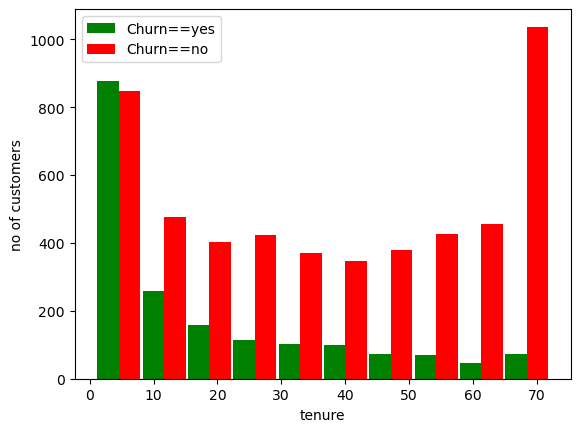

In [67]:
plt.xlabel('tenure')
plt.ylabel('no of customers')
plt.hist([tenure_yes,tenure_no],rwidth=0.95,color=['green','red'],label=['Churn==yes','Churn==no'])
plt.legend()

In [68]:
#sim with monthlychgarges

In [69]:
mtc_no=df2[df2.Churn==0].MonthlyCharges
mtc_yes=df2[df2.Churn==1].MonthlyCharges

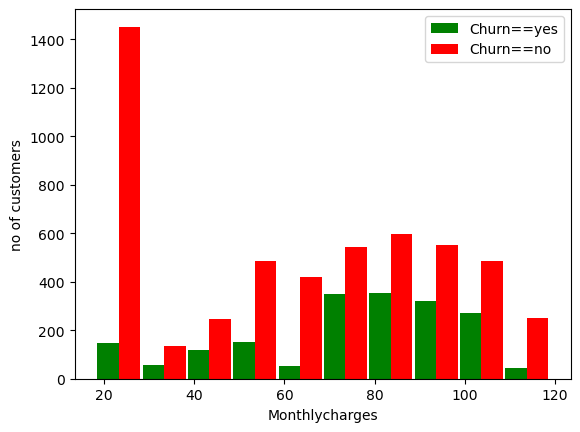

In [70]:
plt.xlabel('Monthlycharges')
plt.ylabel('no of customers')
plt.hist([mtc_yes,mtc_no],rwidth=0.95,color=['green','red'],label=['Churn==yes','Churn==no'])
plt.legend()

In [71]:
#now scaling the data...

In [72]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,1,0,1,0,0,0,2,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [73]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [74]:
cols=['tenure','MonthlyCharges','TotalCharges']

In [75]:
df2[cols]=scale.fit_transform(df2[cols])

In [76]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,2,1,0,1,0,0,0,0,0,1,0,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,1,1,1,0,1,0,0,0,2,0,1,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,1,1,1,1,0,0,0,0,0,1,1,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,2,1,1,0,1,1,0,0,2,0,2,0.239303,0.210241,0
4,1,0,0,0,0.014085,1,1,0,0,0,0,0,0,0,0,1,0,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,0,1,1,0,1,1,1,1,2,1,1,0.662189,0.227521,0
7039,1,0,1,1,1.000000,1,0,0,0,1,1,0,1,1,2,1,3,0.845274,0.847461,0
7040,1,0,1,1,0.140845,0,2,1,1,0,0,0,0,0,0,1,0,0.112935,0.037809,0
7041,0,1,1,0,0.042254,1,0,0,0,0,0,0,0,0,0,1,1,0.558706,0.033210,1


In [77]:
y=df2.pop('Churn')

In [78]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,0.000000,0,2,1,0,1,0,0,0,0,0,1,0,0.115423,0.001275
1,0,0,0,0,0.464789,1,1,1,1,0,1,0,0,0,2,0,1,0.385075,0.215867
2,0,0,0,0,0.014085,1,1,1,1,1,0,0,0,0,0,1,1,0.354229,0.010310
3,0,0,0,0,0.619718,0,2,1,1,0,1,1,0,0,2,0,2,0.239303,0.210241
4,1,0,0,0,0.014085,1,1,0,0,0,0,0,0,0,0,1,0,0.521891,0.015330


In [79]:
x=df2

In [80]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,0.000000,0,2,1,0,1,0,0,0,0,0,1,0,0.115423,0.001275
1,0,0,0,0,0.464789,1,1,1,1,0,1,0,0,0,2,0,1,0.385075,0.215867
2,0,0,0,0,0.014085,1,1,1,1,1,0,0,0,0,0,1,1,0.354229,0.010310
3,0,0,0,0,0.619718,0,2,1,1,0,1,1,0,0,2,0,2,0.239303,0.210241
4,1,0,0,0,0.014085,1,1,0,0,0,0,0,0,0,0,1,0,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,0,1,1,0,1,1,1,1,2,1,1,0.662189,0.227521
7039,1,0,1,1,1.000000,1,0,0,0,1,1,0,1,1,2,1,3,0.845274,0.847461
7040,1,0,1,1,0.140845,0,2,1,1,0,0,0,0,0,0,1,0,0.112935,0.037809
7041,0,1,1,0,0.042254,1,0,0,0,0,0,0,0,0,0,1,1,0.558706,0.033210


In [81]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [82]:
#dividing data on the train,test...

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [85]:
#now building model...

In [86]:
from tensorflow import keras

In [87]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(19,),activation='relu'),
    keras.layers.Dense(18,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [88]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 939us/step - loss: 0.4810 - accuracy: 0.7619
Epoch 2/100
165/165 [==============================] - 0s 866us/step - loss: 0.4285 - accuracy: 0.7969
Epoch 3/100
165/165 [==============================] - 0s 963us/step - loss: 0.4218 - accuracy: 0.8007
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8028
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8017
Epoch 6/100
165/165 [==============================] - 0s 957us/step - loss: 0.4151 - accuracy: 0.8072
Epoch 7/100
165/165 [==============================] - 0s 909us/step - loss: 0.4138 - accuracy: 0.8077
Epoch 8/100
165/165 [==============================] - 0s 866us/step - loss: 0.4111 - accuracy: 0.8079
Epoch 9/100
165/165 [==============================] - 0s 866us/step - loss: 0.4100 - accuracy: 0.8077
Epoch 10/100
165/165 [==============================] - 0s 854us/step - loss:

In [89]:
#now accuracy on test data...

In [90]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 815us/step - loss: 0.4782 - accuracy: 0.7867


[0.47823935747146606, 0.7866894006729126]

In [91]:
#now printing classification report confusion matrix and accuracy,score...

In [92]:
y_pred=model.predict(x_test)

55/55 [==============================] - 0s 685us/step


In [93]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
print(confusion_matrix(y_pred,y_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [95]:
y_pred

array([[0.02031616],
       [0.05684438],
       [0.7484332 ],
       ...,
       [0.70155674],
       [0.32849553],
       [0.10010018]], dtype=float32)

In [96]:
#as you can see value in y_pred are all i decimals but value in y_test is in 0,1 so we need to convert value in y_pred to 0 or 1...

In [97]:
y_pred2=[]
for i in y_pred:
    if i>0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [98]:
y_pred2[:5]

[0, 0, 1, 0, 0]

In [99]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1271
           1       0.62      0.59      0.60       487

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.78      0.79      0.78      1758



In [100]:
print(confusion_matrix(y_pred2,y_test))

[[1098  173]
 [ 202  285]]


In [101]:
print(accuracy_score(y_pred2,y_test))

0.7866894197952219


In [102]:
#now check accuyracy by hyperparametising model...

In [105]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [106]:
import keras_tuner as kt

In [109]:
def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int("num_layers",min_value=1,max_value=10)):#no of hidden layers from 1 to 9...
    if counter==0:
      model.add(
          Dense(
              units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8), #no of neurons in 1st hidden layer....
              activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid']),#best optimizer from no of optimizers
              input_dim=8)
      )
      
    else:
      model.add(
          Dense(
              units=hp.Int("units"+str(i),min_value=8,max_value=128,step=8),
              activation=hp.Choice('Activation'+str(i),values=['relu','tanh','sigmoid']),
              )
      )
    counter+=1
  model.add(Dense(1,activation='sigmoid')) #designing output model.....
  optimizer=hp.Choice("optimizer",values=['adam','rmsprop','adadelta','sgd','nadam']) #optimizer for output layer....
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy']) #now compiling model...
  return model


In [111]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='tuning',project_name='version4')

INFO:tensorflow:Reloading Oracle from existing project tuning\version4\oracle.json
INFO:tensorflow:Reloading Tuner from tuning\version4\tuner0.json


In [112]:
tuner.search(x_train,y_train,epochs=7)

INFO:tensorflow:Oracle triggered exit


In [114]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 112,
 'Activation0': 'tanh',
 'optimizer': 'adam',
 'units1': 80,
 'Activation1': 'sigmoid',
 'units2': 24,
 'Activation2': 'tanh',
 'units3': 64,
 'Activation3': 'sigmoid',
 'units4': 24,
 'Activation4': 'relu',
 'units5': 72,
 'Activation5': 'tanh',
 'units6': 80,
 'Activation6': 'tanh',
 'units7': 120,
 'Activation7': 'sigmoid',
 'units8': 72,
 'Activation8': 'relu',
 'units9': 8,
 'Activation9': 'relu'}

In [115]:
#now get best model at 1st index 

In [116]:
model2=tuner.get_best_models(num_models=1)[0]

In [117]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1008      
                                                                 
 dense_1 (Dense)             (None, 80)                9040      
                                                                 
 dense_2 (Dense)             (None, 24)                1944      
                                                                 
 dense_3 (Dense)             (None, 64)                1600      
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 72)                1800      
                                                                 
 dense_6 (Dense)             (None, 1)                 7

In [124]:
#now building model as per the best model given by kerastuner

In [126]:
model_2=keras.Sequential([
    keras.layers.Dense(80,activation='relu',input_shape=(19,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])


model_2.compile(optimizer='adam',
               metrics=['accuracy'],
               loss='binary_crossentropy')

In [127]:
model_2.fit(x_train,y_train,epochs=112)

Epoch 1/112
165/165 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7332
Epoch 2/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7696
Epoch 3/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7763
Epoch 4/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7791
Epoch 5/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7882
Epoch 6/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7888
Epoch 7/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7878
Epoch 8/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.7903
Epoch 9/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7901
Epoch 10/112
165/165 [==============================] - 0s 1ms/step - loss: 0.4459 - accura

In [128]:
y_pred2=model_2.predict(x_test)

55/55 [==============================] - 0s 685us/step


In [129]:
y_pred2

array([[0.00543127],
       [0.09777248],
       [0.7906908 ],
       ...,
       [0.28189316],
       [0.4605001 ],
       [0.00087028]], dtype=float32)

In [130]:
y_pred_2=[]
for i in y_pred2:
    if i>0.5:
        y_pred_2.append(1)
    else:
        y_pred_2.append(0)
        

In [131]:
y_pred_2

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [133]:
model_2.evaluate(x_test,y_test)

55/55 [==============================] - 0s 831us/step - loss: 0.4574 - accuracy: 0.8003


[0.45743125677108765, 0.8003413081169128]

In [134]:
print(accuracy_score(y_pred_2,y_test))

0.8003412969283277


In [135]:
print(classification_report(y_pred_2,y_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1425
           1       0.48      0.66      0.56       333

    accuracy                           0.80      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.83      0.80      0.81      1758



In [137]:
print(confusion_matrix(y_pred_2,y_test))

[[1187  238]
 [ 113  220]]
